# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# The dataset used: Bank Transaction Dataset for Fraud Detection


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#ReadDataset
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
#InfoDataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
#DescribeDataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Memahami Struktur Data: Baris-Kolom
rows, cols = df.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

Jumlah baris: 2512
Jumlah kolom: 16


In [6]:
#Memahami Struktur Data: JenisData [object = category | int-float = numeric]
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


In [7]:
#Menangani Data Hilang: checknulldata
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [8]:
# Analisis Distribusi dan Korelasi: Statistik Deskriptif (Data Numerik)
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


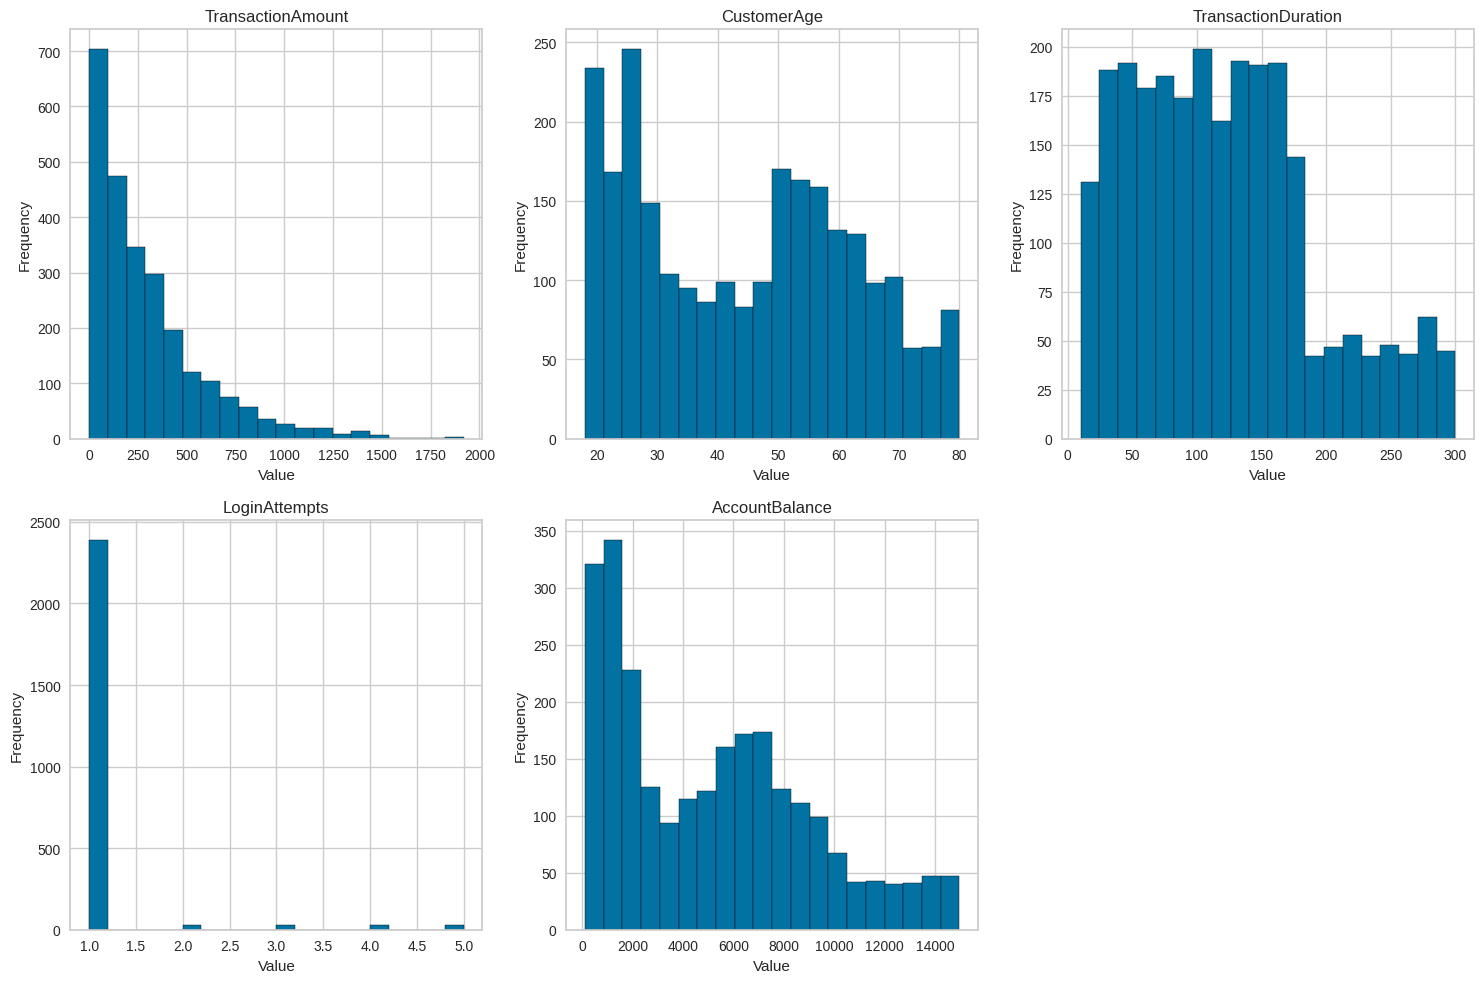

In [9]:
# Analisis Distribusi dan Korelasi: Visualisasi Histogram Variabel Numerik

numeric_var = ['TransactionAmount', 'CustomerAge' ,'TransactionDuration'  , 'LoginAttempts', 'AccountBalance']

n_cols = 3
n_rows = -(-len(numeric_var) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_var):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

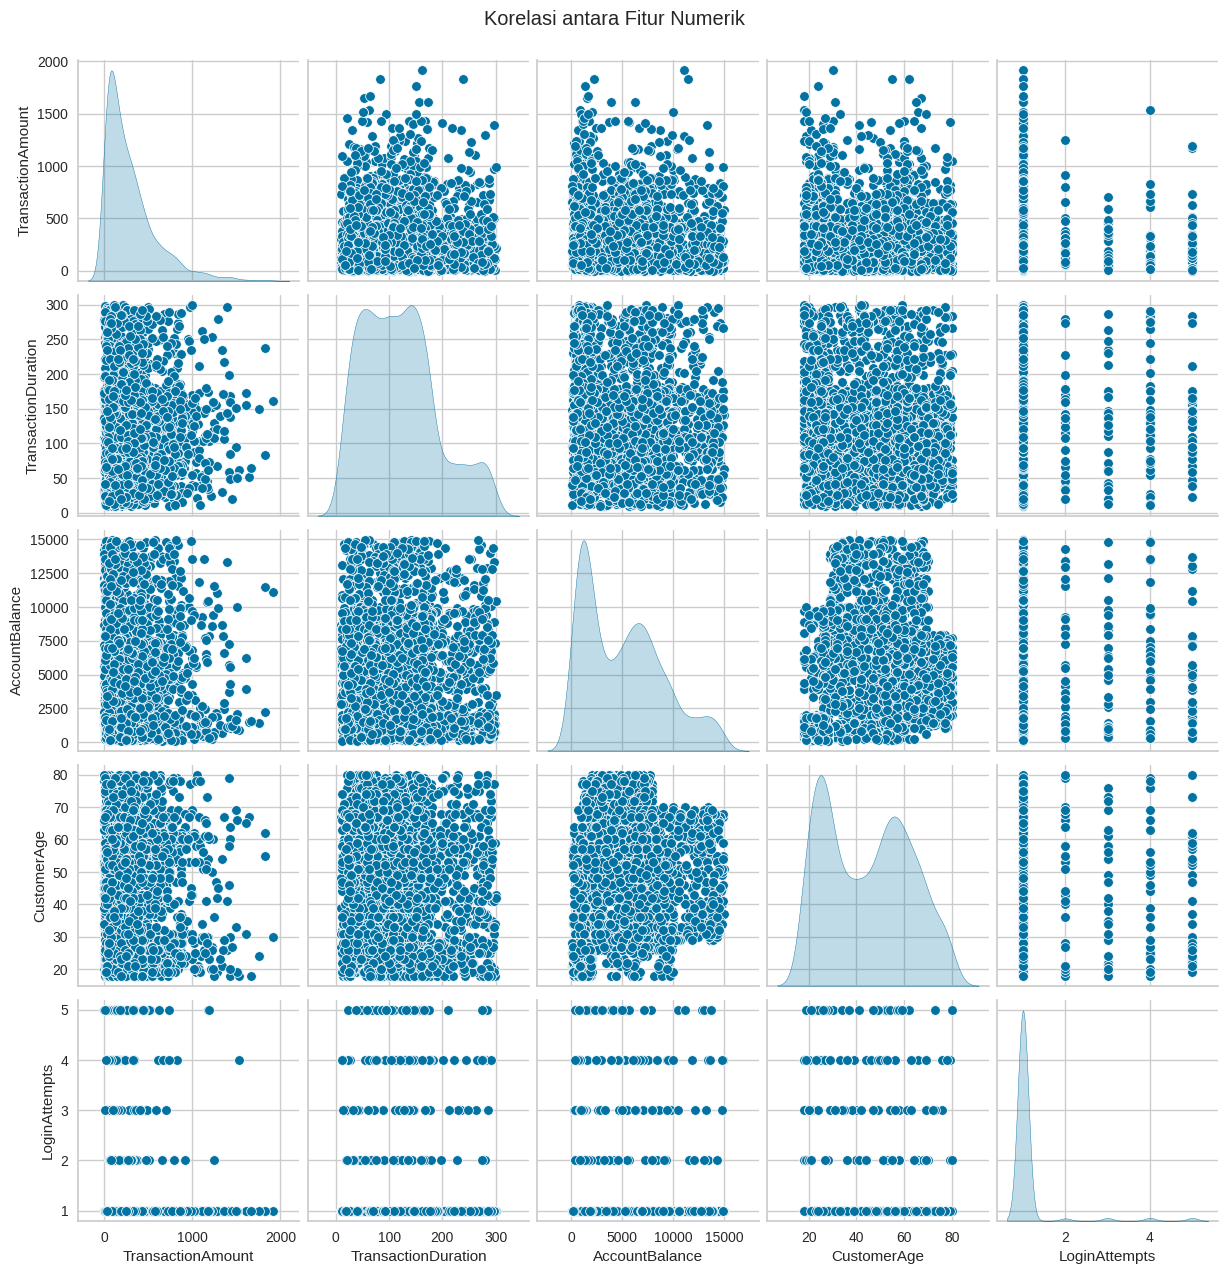

In [10]:
# Analisis Distribusi dan Korelasi: ScatterPlot (Data Numerik)
numeric_var = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge', 'LoginAttempts']
sns.pairplot(df[numeric_var], diag_kind='kde')
plt.suptitle('Korelasi antara Fitur Numerik', y=1.02)
plt.show()

In [11]:
#Visualisasi Data: Deskripsi Data Kategori
cat_df = df.select_dtypes(include=['object'])
cat_df.describe()

,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX002496,AC00460,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


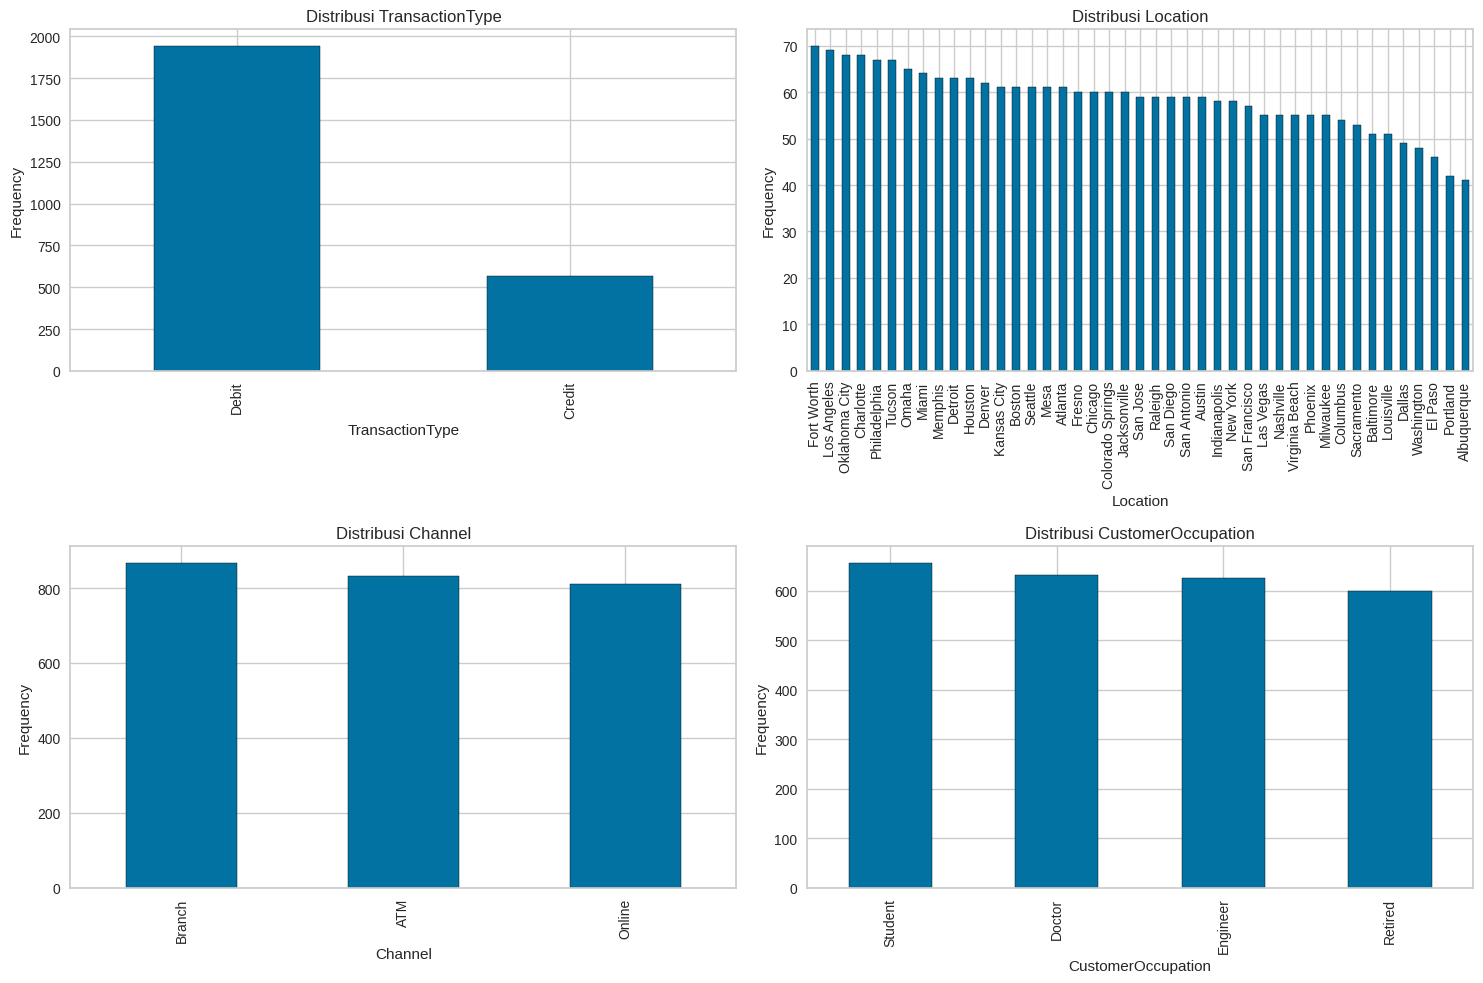

In [12]:
#Visualisasi Data: Grafik Distribusi Frekuensi (Data Kategori - ununique)

cat_var = ['TransactionType', 'Location' , 'Channel', 'CustomerOccupation']

n_cols = 2
n_rows = -(-len(cat_var) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(cat_var):
    df[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


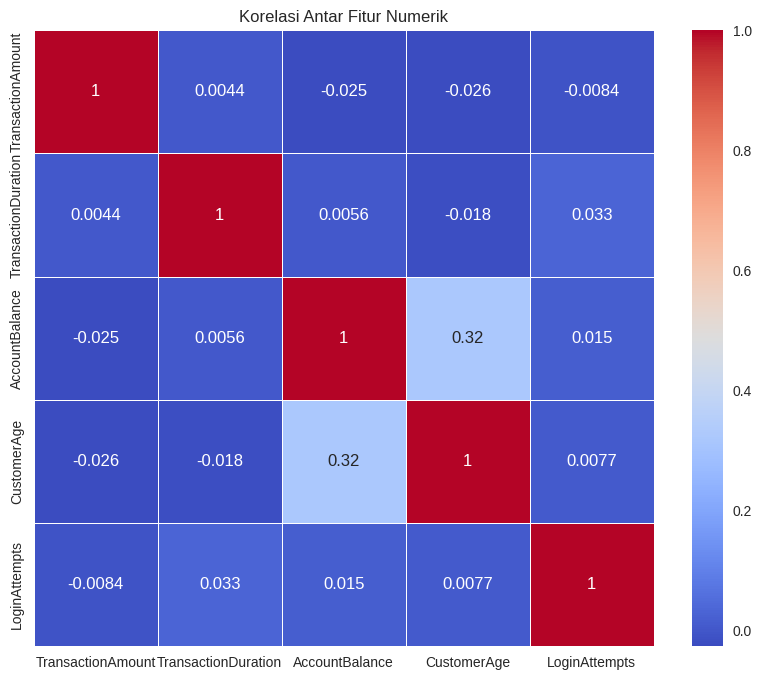

In [13]:
#Visualisasi Data: HeatMap for check data numeric
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge', 'LoginAttempts']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
# MissingValuesCheck
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [15]:
# DuplicateData
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


In [16]:
# Drop unrelevant-column
drop_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'PreviousTransactionDate', 'TransactionDuration', 'TransactionType']
df.drop(columns=[col for col in drop_columns if col in df.columns], inplace=True)

In [17]:
# Encoding Categorical Data
cat = ['CustomerOccupation']
label_encoders = {}
for col in cat:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

In [18]:
# Outlier
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        print(f"Outliers:'{col}': {outliers.sum()}")

        df.drop(index=df[outliers].index, inplace=True)

remove_outliers(df)
df.head()


Outliers:'TransactionAmount': 113
Outliers:'CustomerAge': 0
Outliers:'CustomerOccupation': 0
Outliers:'LoginAttempts': 117
Outliers:'AccountBalance': 0


,TransactionAmount,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance
0,14.09,70,0,1,5112.21
1,376.24,68,0,1,13758.91
2,126.29,19,3,1,1122.35
3,184.50,26,3,1,8569.06
4,13.45,26,3,1,7429.40


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

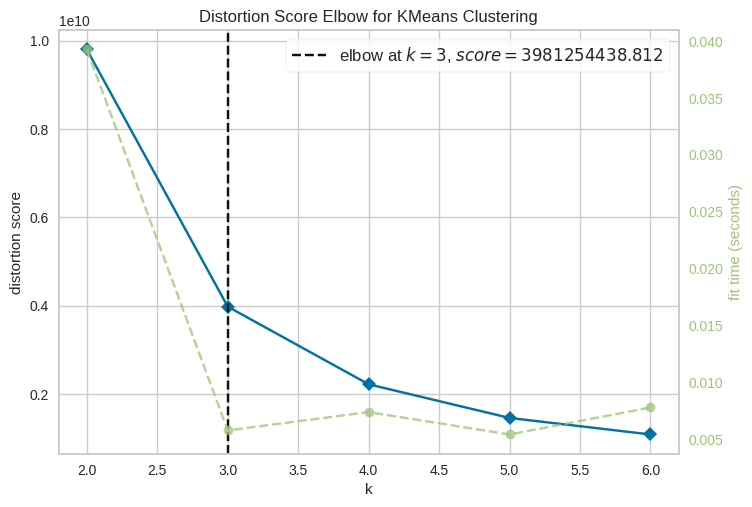

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#Elbow Method
X = df.values
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,7))
visualizer.fit(X)
visualizer.show()

In [20]:
#KMeans Clustering
kmeans = KMeans(n_clusters=i, random_state=42)
clusters = kmeans.fit_predict(X)
df["Cluster"] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

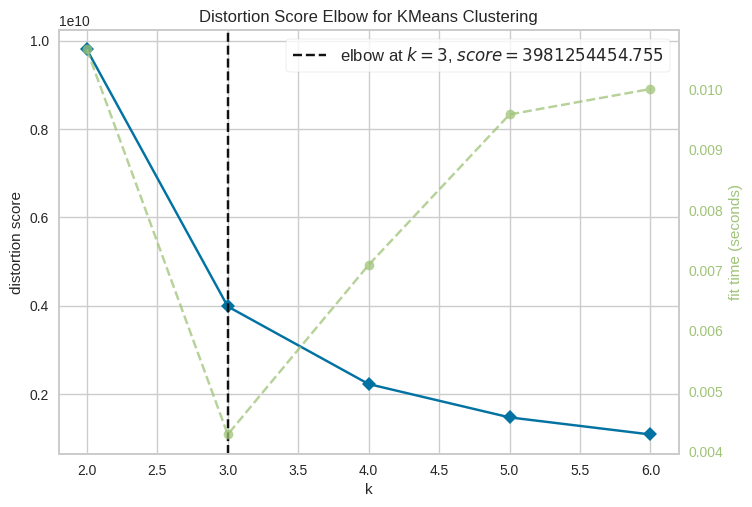

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#ElbowCheck
X = df.values
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,7))
visualizer.fit(X)
visualizer.show()

In [22]:
#SillhouetteScore
silhouette_scores = {}

for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores[i] = score
    print(f"Silhouette Score untuk {i} cluster: {score}")

opt_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal jumlah cluster: {opt_clusters}")

kmeans = KMeans(n_clusters=opt_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

Silhouette Score untuk 2 cluster: 0.6220310586691565
Silhouette Score untuk 3 cluster: 0.6297344283739812
Silhouette Score untuk 4 cluster: 0.6050986414187748
Silhouette Score untuk 5 cluster: 0.5852438436739245
Silhouette Score untuk 6 cluster: 0.5541045568247317
Optimal jumlah cluster: 3


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
#Feature Selection: Correlation between AccountBalance and LoginAttemps
X_selected = df[["AccountBalance", "CustomerAge"]].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

In [24]:
# Clustering Ulang
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_selected)
df["Cluster"] = labels

In [25]:
#Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score: feature selection: {silhouette_avg:.3f}")

Silhouette Score: feature selection: 0.640


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

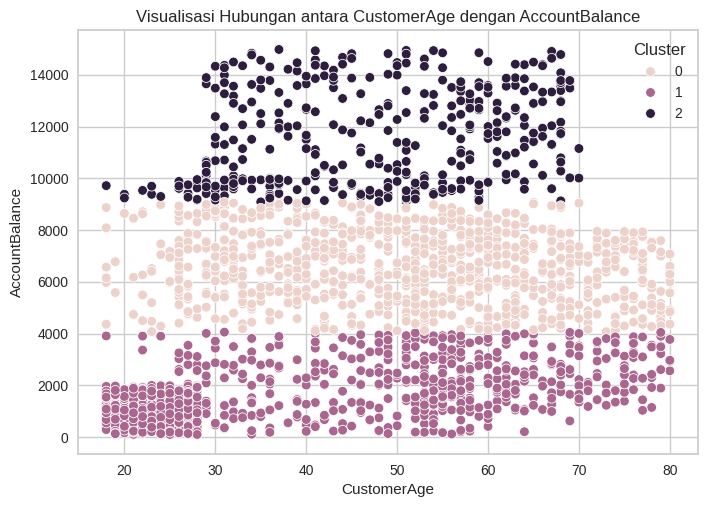

In [26]:
# Visualisasi Hasil Clustering
sns.scatterplot (x=df["CustomerAge"], y=df["AccountBalance"], hue=df["Cluster"])
plt.title("Visualisasi Hubungan antara CustomerAge dengan AccountBalance")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [27]:
df['Cluster']=kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [28]:
#inverse-encode
for col in label_encoders:
    df[col] = label_encoders[col].inverse_transform(df[col])

In [29]:
# Tidak melakukan normalisasi

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [30]:
def mode(series):
    return series.mode()[0] if not series.mode().empty else None

# Hasil Cluster (Interpretasi Clustering)
numeric_var = df.select_dtypes(include=["number"]).columns.tolist()
cat_var = df.select_dtypes(include=["object"]).columns.tolist()
if "Cluster" in numeric_var:
    numeric_var.remove("Cluster")

aggregated_data = df.groupby("Cluster").agg({
    **{col: ["min", "max", "mean", "std"] for col in numeric_var},
    **{col: mode for col in cat_var}
})
aggregated_data

TransactionAmount                                 CustomerAge      \
                      min     max        mean         std         min max   
Cluster                                                                     
0                    0.32  903.19  252.889897  211.818589          18  80   
1                    0.26  883.92  257.147811  219.364059          18  80   
2                    1.14  896.79  257.200431  227.593053          18  70   

                              LoginAttempts               AccountBalance  \
              mean        std           min max mean  std            min   
Cluster                                                                    
0        51.591533  15.746749             1   1  1.0  0.0        4064.02   
1        37.805207  18.191831             1   1  1.0  0.0         101.25   
2        47.630728  12.972154             1   1  1.0  0.0        9088.36   

                                             CustomerOccupation  
              max          mean          std               mode  
Cluster                                                          
0         9077.62   6551.545252  1325.415062           Engineer  
1         4057.10   1583.092247  1036.683493            Student  
2        14977.99  11630.987089  1820.105993             Doctor

## Cluster 0:
* **Rata-rata TransactionAmount**: 252.89 (std ±211)
* **Rata-rata CustomerAge**: 51.59 tahun (std ±15)
* **Dominan CustomerOccupation**: Engineer
* **Rata-rata LoginAttempts**: 1.0 (std 0)
* **Rata-rata AccountBalance**: 6.5K (std ±13)
* **Analisis**: Cluster ini memiliki pelanggan dengan usia tertua, dan rata-rata pekerjaan pelanggan sebagai engineer. Aktivitas akses stabil, saldo cukup baik (kedua terbanyak), tetapi transaksi terendah dari dua cluster lainnya.
* **Kesimpulan**: Pelanggan dengan usia tertua, dan secara finansial baik.

## Cluster 1:
* **Rata-rata TransactionAmount**: 257.15 (std ±219)
* **Rata-rata CustomerAge**: 37.81 tahun (std ±18)
* **Dominan CustomerOccupation**: Student
* **Rata-rata LoginAttempts**: 1.0 (std 0)
* **Rata-rata AccountBalance**: 1.58K (std ±10)
* **Analisis**: Cluster ini memiliki pelanggan dengan usia muda, dan rata-rata pelanggan sebagai student. Aktivitas akses stabil, saldo terendah, tetapi transaksi kedua tertinggi (sedang).
* **Kesimpulan**:Pelanggan dengan usia muda, dan secara finansial kurang baik.

## Cluster 2:
* **Rata-rata TransactionAmount**: 257.20 (std ±227)
* **Rata-rata CustomerAge**: 47.63 tahun (std ±12)
* **Dominan CustomerOccupation**: Doctor
* **Rata-rata LoginAttempts**: 1.0 (std 0)
* **Rata-rata AccountBalance**: 11.63K (std ±18)
* **Analisis**: Cluster ini memiliki pelanggan dengan usia tua, dan rata-rata pelanggan sebagai doctor. Aktivitas akses stabil, saldo tertinggi, transaksi tertinggi.
* **Kesimpulan**: Pelanggan dengan usia tua, dan secara finansial sangat baik.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [31]:
# Periksa kolom-kolom dalam dataset untuk memastikan proses clustering work.
print(df.columns)

Index(['TransactionAmount', 'CustomerAge', 'CustomerOccupation',
       'LoginAttempts', 'AccountBalance', 'Cluster'],
      dtype='object')


In [32]:
#SimpanDataset
df.to_csv("Dataset_inisiasi.csv", index=False)